# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.set_option("display.max_columns", None)

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error

from statsmodels.tools.tools import add_constant
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
bikedata = pd.read_csv("day.csv")
bikedata

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [ ]:
bikedata.shape

(730, 16)

##Description of Variables in Dataset


- instant: record index
- dteday : date
- season : season (1:spring, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2018, 1:2019)
- mnth : month ( 1 to 12)
- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
- weathersit : 
    -- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
  -- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    -- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    -- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : temperature in Celsius
- atemp: feeling temperature in Celsius
- hum: humidity
- windspeed: wind speed
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

In [ ]:
bikedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [ ]:
bikedata.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [ ]:
bikedata.isnull().sum()
#no null data is present

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

# Data cleaning

In [ ]:
#Removing unnecessary variables from the equation.
#The holiday column is unnecessary since the workingday column already has such information.
#Because we have variables like year and month, we don't need to utilise dteday.

#As an index variable, #instant is unnecessary.

#Since casual+registered=cnt, that's what we're aiming for. 
#As a result, the casual and registered columns cannot be treated as separate variables.


In [ ]:
bikedata.drop(['holiday','dteday','instant', 'casual','registered'],axis=1,inplace=True)

In [ ]:
bikedata.shape
#As we can see now shape is (730,11) earlier it was (730,16)

(730, 11)

In [ ]:
#check the size of data
bikedata.size

8030

In [ ]:
bikedata.dtypes

season          int64
yr              int64
mnth            int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
cnt             int64
dtype: object

In [ ]:
#count of season col
bikedata.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [ ]:
#count of weather col
bikedata.weathersit.value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [ ]:
bikedata.corr()

,season,yr,mnth,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
season,1.000000e+00,-3.279074e-16,8.310321e-01,-0.003081,0.013762,0.021306,0.333361,0.342014,0.208220,-0.229607,0.404584
yr,-3.279074e-16,1.000000e+00,-5.162656e-16,-0.005466,-0.002945,-0.050322,0.048789,0.047215,-0.112547,-0.011624,0.569728
mnth,8.310321e-01,-5.162656e-16,1.000000e+00,0.009523,-0.004688,0.045613,0.219083,0.226430,0.224937,-0.208013,0.278191
weekday,-3.081198e-03,-5.466369e-03,9.522969e-03,1.000000,0.035800,0.031112,-0.000168,-0.007539,-0.052290,0.014283,0.067534
workingday,1.376178e-02,-2.945396e-03,-4.687953e-03,0.035800,1.000000,0.060236,0.053470,0.052940,0.023202,-0.018666,0.062542
weathersit,2.130636e-02,-5.032247e-02,4.561335e-02,0.031112,0.060236,1.000000,-0.119503,-0.120559,0.590277,0.039769,-0.295929
temp,3.333607e-01,4.878919e-02,2.190833e-01,-0.000168,0.053470,-0.119503,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,3.420139e-01,4.721519e-02,2.264302e-01,-0.007539,0.052940,-0.120559,0.991696,1.000000,0.141512,-0.183876,0.630685
hum,2.082196e-01,-1.125471e-01,2.249368e-01,-0.052290,0.023202,0.590277,0.128565,0.141512,1.000000,-0.248506,-0.098543
windspeed,-2.296069e-01,-1.162435e-02,-2.080131e-01,0.014283,-0.018666,0.039769,-0.158186,-0.183876,-0.248506,1.000000,-0.235132


##Handling Outliers

In [ ]:
#Print number of unique values in all columns
bikedata.nunique()

season          4
yr              2
mnth           12
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
dtype: int64

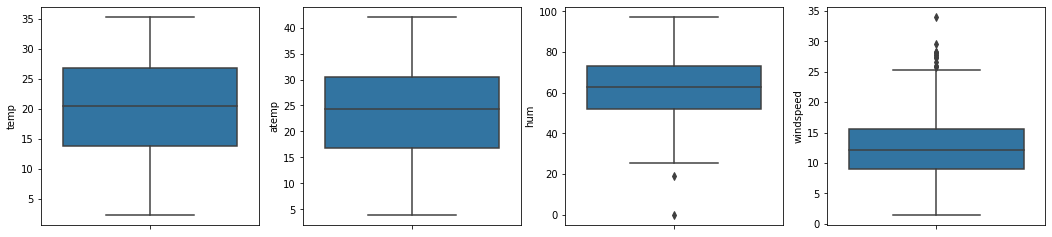

In [ ]:
# Drawing box plots for indepent variables with continuous values
cols = ['temp', 'atemp', 'hum', 'windspeed']
plt.figure(figsize=(18,4))

i = 1
for col in cols:
    plt.subplot(1,4,i)
    sns.boxplot(y=col, data=bikedata)
    i+=1

In [ ]:
#It is clear from these charts that there are no outliers that need to be addressed. We are satisfied with the fact that the data set does not include any outliers.

# EDA

In [ ]:
# Converting season and weathersit to categorical types as they are much useful that way

bikedata.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace = True)

bikedata.weathersit.replace({1:'good',2:'moderate',3:'bad',4:'severe'},inplace = True)

bikedata.mnth = bikedata.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                  7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'})

bikedata.weekday = bikedata.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'})
bikedata.head()

,season,yr,mnth,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,sat,0,moderate,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,sun,0,moderate,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,mon,1,good,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,tue,1,good,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,wed,1,good,9.305237,11.46350,43.6957,12.522300,1600


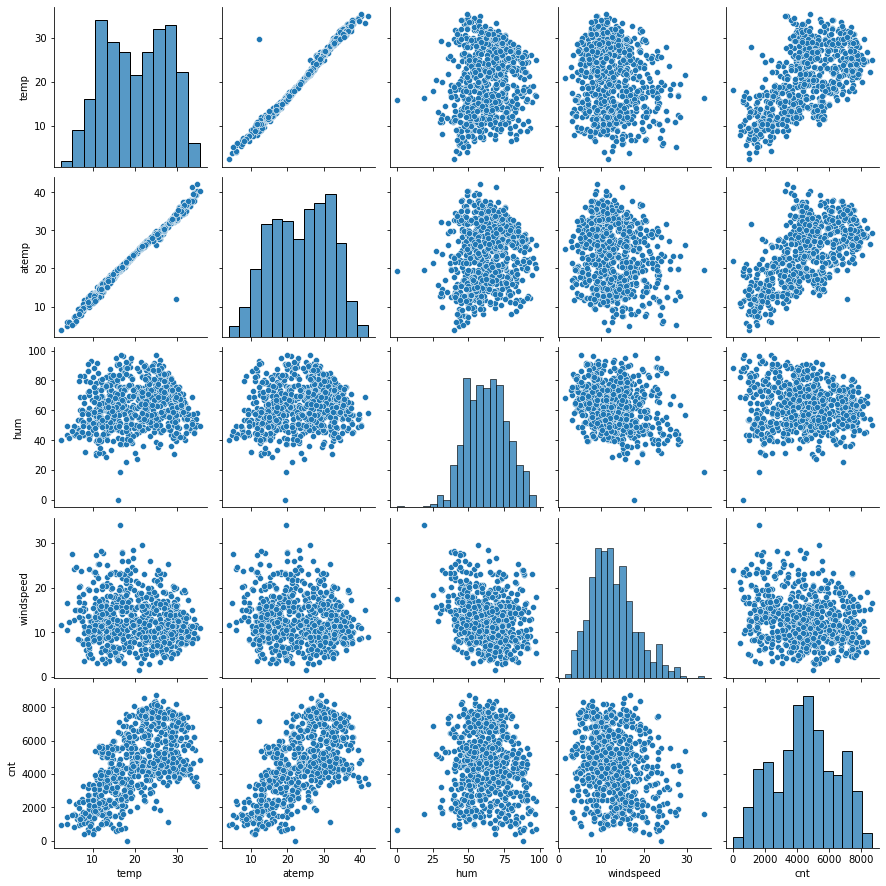

In [ ]:
# Visualizing continuous variables using pair plot
sns.pairplot(bikedata, vars=['temp','atemp','hum','windspeed',"cnt"])
plt.show()

In [ ]:
## Conclusion from above:
#- It would seem that the temperature and the average temperature have the most correlation with the variable cnt that we are interested in.
# - temp and atemp are closely connected to one another in a number of ways.

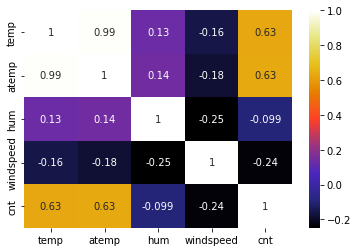

In [ ]:
# Examining the connection that the continuous variables have with one another
sns.heatmap(bikedata[['temp','atemp','hum','windspeed','cnt']].corr(), cmap='CMRmap', annot = True)
plt.show()

In [ ]:
#From this, we may deduce that temp and atemp have a stronger association than
#.99 indicates that the value is very close to one (a strong correlation), and as atemp appears to be obtained from temp, 
#the atemp field may be omitted here.

## Heatmap for correlation

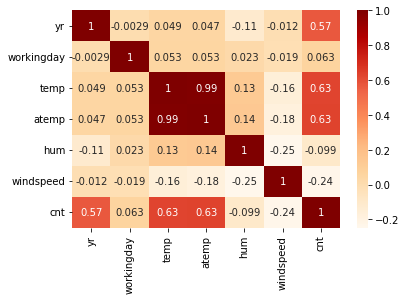

In [ ]:
#Correlations for numeric variables
cor=bikedata.corr()
sns.heatmap(cor, cmap="OrRd", annot = True)
plt.show()

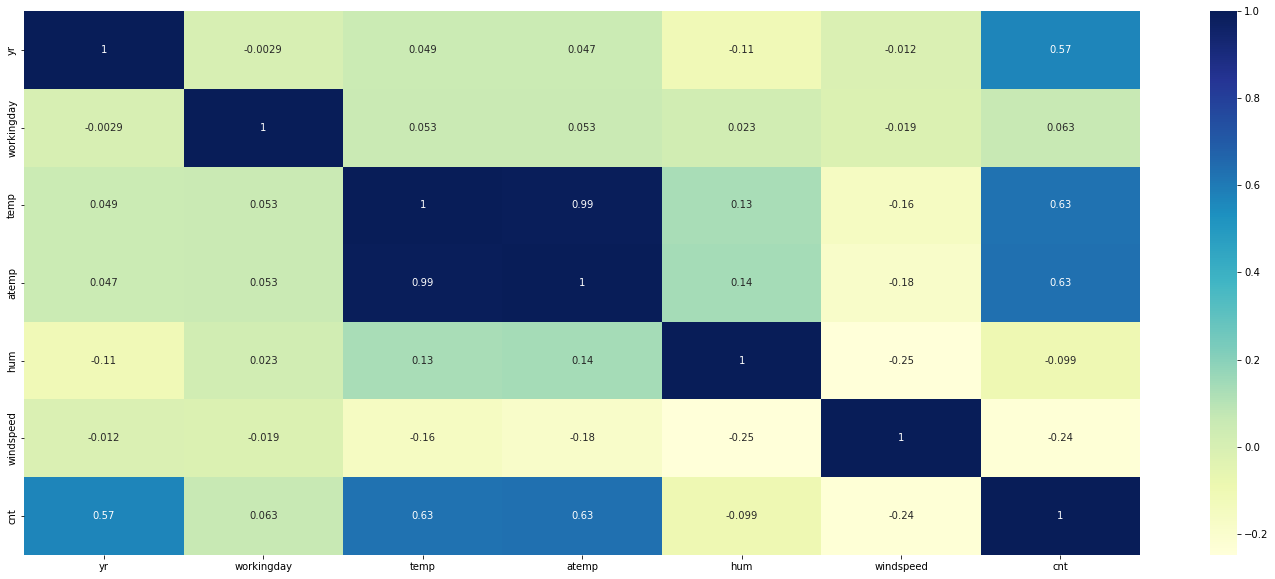

In [ ]:
#Calculate Correlation
corr = bikedata.corr()
plt.figure(figsize=(25,10))

#Draw Heatmap of correlation
sns.heatmap(corr,annot=True, cmap='YlGnBu' )
plt.show()

In [ ]:
#According to the correlation map, temp, atemp, and days old appear to have a very high degree of connection with one another; hence, only should be included for the model. However, because the Variance Inflation Factor is going to be used later on in the model building process, let's eliminate it depending on that.
#Additionally, we find that the Target variable has a linear connection with a few of the independent variables. A promising indicator for developing a model based on linear regression.

## Categorical Variabels with target variables analysation

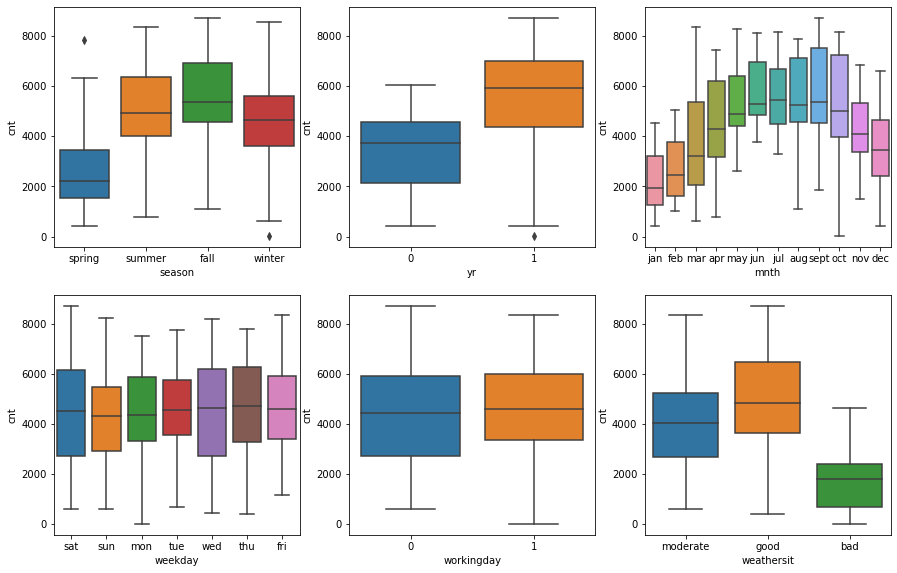

In [ ]:
# Boxplot for categorical variables to see demands
vars_cat = ['season','yr','mnth','weekday','workingday','weathersit']
plt.figure(figsize=(15, 15))
for i in enumerate(vars_cat):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(data=bikedata, x=i[1], y='cnt')
plt.show()

Observations: 
- There is a linear pattern among independent categorical factors and the target value cnt. 
- The season, year, month, and weathersit all seem to have a substantial impact on the demand for bike rental when contrasted to work day and weekday.

In [ ]:
# Analysing categorical variables on target variable, cnt.

def bar_cat(feature):
    sns.barplot(feature,'cnt',data=bikedata)
    plt.title("Count vs "+str(feature)+" feature")
    plt.show()
    
# function that will create a summary statistics of the connection that exists between each categorical variable and the target variable.
def stats_cat(feature):
    cat = bikedata.groupby(feature)['cnt'].agg(['sum', 'mean','count']).sort_values('sum',ascending = False)
    cat['sum in %']=cat['sum']/bikedata.cnt.sum()*100
    cat['count in %']=cat['count']/bikedata.cnt.count()*100
    return round(cat,2)
            

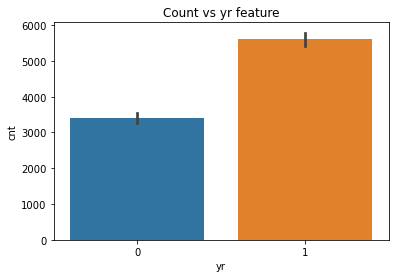

        sum     mean  count  sum in %  count in %
yr                                               
1   2047742  5610.25    365     62.23        50.0
0   1243103  3405.76    365     37.77        50.0


In [ ]:
# Year Vs Count
bar_cat('yr')
print(stats_cat('yr'))

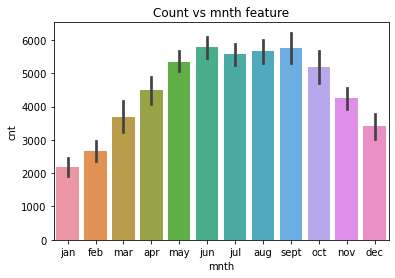

         sum     mean  count  sum in %  count in %
mnth                                              
aug   351194  5664.42     62     10.67        8.49
jun   346342  5772.37     60     10.52        8.22
sept  345991  5766.52     60     10.51        8.22
jul   344948  5563.68     62     10.48        8.49
may   331686  5349.77     62     10.08        8.49
oct   322352  5199.23     62      9.80        8.49
apr   269094  4484.90     60      8.18        8.22
nov   254831  4247.18     60      7.74        8.22
mar   228920  3692.26     62      6.96        8.49
dec   211036  3403.81     62      6.41        8.49
feb   149518  2669.96     56      4.54        7.67
jan   134933  2176.34     62      4.10        8.49


In [ ]:
# Month Vs Count
bar_cat('mnth')
print(stats_cat('mnth'))

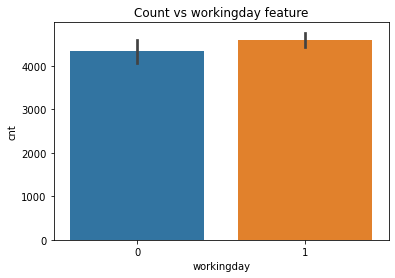

                sum     mean  count  sum in %  count in %
workingday                                               
1           2290576  4590.33    499      69.6       68.36
0           1000269  4330.17    231      30.4       31.64


In [ ]:
# Working day Vs Count
bar_cat('workingday')
print(stats_cat('workingday'))

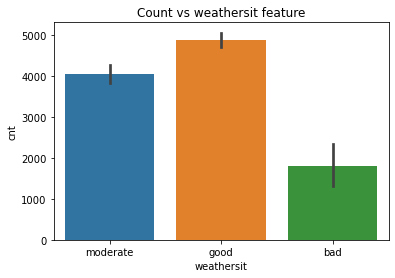

                sum     mean  count  sum in %  count in %
weathersit                                               
good        2257952  4876.79    463     68.61       63.42
moderate     995024  4044.81    246     30.24       33.70
bad           37869  1803.29     21      1.15        2.88


In [ ]:
# Weather Vs Count
bar_cat('weathersit')
print(stats_cat('weathersit'))

**Inference**:
  The preceding graphs make it abundantly evident that there is a fluctuation in the demand for bike rentals with regard to changes in the season, year, month, and weathersit, although there has been no notable trend noticed with variations in the variables working day.

# Data Prep for Linear Regression 

In [ ]:
#Dummy variable creation
Season = pd.get_dummies(bikedata['season'],drop_first=True)
Weather = pd.get_dummies(bikedata['weathersit'],drop_first=True)
Day = pd.get_dummies(bikedata['weekday'],drop_first=True)
Month = pd.get_dummies(bikedata['mnth'],drop_first=True)

bikedata =pd.concat([bikedata,Season, Weather, Day, Month],axis=1)
bikedata.head()

,season,yr,mnth,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,spring,summer,winter,good,moderate,mon,sat,sun,thu,tue,wed,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sept
0,spring,0,jan,sat,0,moderate,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,spring,0,jan,sun,0,moderate,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,spring,0,jan,mon,1,good,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,spring,0,jan,tue,1,good,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
4,spring,0,jan,wed,1,good,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0


In [ ]:
#Deleting the orginal columns
bikedata.drop(['season', 'weathersit', 'weekday','mnth'],axis=1,inplace=True)
bikedata.head()

,yr,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,good,moderate,mon,sat,sun,thu,tue,wed,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sept
0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
4,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0


## Model creation

In [ ]:
#Train test split

train, test = train_test_split(bikedata, train_size = 0.7, test_size = 0.3, random_state = 42)

train.head()

,yr,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,good,moderate,mon,sat,sun,thu,tue,wed,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sept
683,1,1,13.188347,16.22460,62.0417,10.250129,5445,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
645,1,0,15.716653,19.38040,70.9583,12.708493,5478,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
163,0,1,26.035000,30.08270,49.4583,20.458450,5020,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
360,0,1,13.325000,16.38165,76.2500,12.626150,1162,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
640,1,1,26.957500,29.95665,79.3750,4.458569,7572,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
test.head()

,yr,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,good,moderate,mon,sat,sun,thu,tue,wed,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sept
468,1,0,20.295000,24.39980,50.2917,12.791439,7460,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
148,0,0,27.367500,30.77750,81.8750,14.333846,4788,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
302,0,0,13.085847,16.06645,62.3750,11.833339,3331,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
355,0,1,17.356653,21.30605,75.7500,3.167425,3068,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
515,1,1,27.880000,31.56645,49.2917,13.083693,7338,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
train.shape


(510, 29)

In [ ]:
test.shape

(219, 29)

## Scaling Variables

In [ ]:
#Scaling the numeric data using the MinMax scalar, since this won't have any effect on the dummy variables.
scaler=MinMaxScaler()
num_vars=['temp','hum','windspeed','cnt']
train[num_vars] = scaler.fit_transform(train[num_vars])
train.head()

,yr,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,good,moderate,mon,sat,sun,thu,tue,wed,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sept
683,1,1,0.327133,16.22460,0.639330,0.327101,0.605336,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
645,1,0,0.403972,19.38040,0.731215,0.419004,0.609320,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
163,0,1,0.717562,30.08270,0.509660,0.708724,0.554026,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
360,0,1,0.331287,16.38165,0.785745,0.415925,0.088253,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
640,1,1,0.745598,29.95665,0.817947,0.110593,0.862127,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
#y = only target variable
y_train = train.pop('cnt')
x_train = train

In [ ]:
train.head()

,yr,workingday,temp,atemp,hum,windspeed,spring,summer,winter,good,moderate,mon,sat,sun,thu,tue,wed,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sept
683,1,1,0.327133,16.22460,0.639330,0.327101,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
645,1,0,0.403972,19.38040,0.731215,0.419004,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
163,0,1,0.717562,30.08270,0.509660,0.708724,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
360,0,1,0.331287,16.38165,0.785745,0.415925,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
640,1,1,0.745598,29.95665,0.817947,0.110593,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
y_train.head()

683    0.605336
645    0.609320
163    0.554026
360    0.088253
640    0.862127
Name: cnt, dtype: float64

In [ ]:
#  linear regression on train dataset
model_lm = LinearRegression()
model_lm.fit(x_train, y_train)
#Selecting features using RFE
rfe = RFE(model_lm)
rfe = rfe.fit(x_train, y_train)

rfe

RFE(estimator=LinearRegression())

In [ ]:
# Used this ranking provided by the rfe to display the effect of each of the independent variables
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('workingday', False, 2),
 ('temp', True, 1),
 ('atemp', False, 11),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 6),
 ('winter', True, 1),
 ('good', True, 1),
 ('moderate', True, 1),
 ('mon', False, 9),
 ('sat', True, 1),
 ('sun', False, 3),
 ('thu', False, 13),
 ('tue', False, 7),
 ('wed', False, 12),
 ('aug', False, 10),
 ('dec', True, 1),
 ('feb', False, 8),
 ('jan', False, 14),
 ('jul', True, 1),
 ('jun', False, 15),
 ('mar', True, 1),
 ('may', False, 4),
 ('nov', True, 1),
 ('oct', False, 5),
 ('sept', True, 1)]

In [ ]:
# The rfe rating list is used to choose the influential independent factors.
slt = x_train.columns[rfe.support_]
slt

Index(['yr', 'temp', 'hum', 'windspeed', 'spring', 'winter', 'good',
       'moderate', 'sat', 'dec', 'jul', 'mar', 'nov', 'sept'],
      dtype='object')

In [ ]:
# selected varaibles are assigned to the x data to build the actual model
x_train_rfe = x_train[slt]
# adding constant
x_train_rfe = sm.add_constant(x_train_rfe)
#Fitting the data using Linear Regression to build model
model_lm = sm.OLS(y_train,x_train_rfe).fit()   
print(model_lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     182.0
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          7.63e-185
Time:                        10:12:14   Log-Likelihood:                 480.87
No. Observations:                 510   AIC:                            -931.7
Df Residuals:                     495   BIC:                            -868.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1124      0.052      2.182      0.0

In [ ]:
# Dropping sat from x_train_lm because it's p-value is higher than 0.05, and hence it's not significant
x_train_rfe = x_train_rfe.drop('sat', axis =1)
x_train_rfe = sm.add_constant(x_train_rfe)
model_lm = sm.OLS(y_train, x_train_rfe).fit()
print(model_lm.summary())
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X = x_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     195.4
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          1.52e-185
Time:                        10:12:14   Log-Likelihood:                 479.78
No. Observations:                 510   AIC:                            -931.6
Df Residuals:                     496   BIC:                            -872.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1187      0.051      2.310      0.0

,Features,VIF
0,const,146.79
7,good,10.63
8,moderate,9.04
2,temp,3.55
5,spring,2.90
6,winter,2.21
3,hum,1.87
12,nov,1.73
10,jul,1.36
9,dec,1.29


In [ ]:
#Now all p-values are <0.05 and the VIF is also displayed to check if that is in range or not

In [ ]:
# Few Assumptions
# -The values that were actually collected have a linear connection with the values that were projected.
# -The variance of the error terms follows a normal distribution.
# -Since the precision of the training and the testing are almost identical, there is no instance of overfitting or underfitting.
# -Both const and good col have VIF values that are greater than what is considered tolerable. 
# -As a result, it is necessary to eliminate at least one of them and to construct the model once again.

In [ ]:
#Dropping constant to see VIF of other variables to check whether all fall within the acceptable range.
x_train_rfe = x_train_rfe.drop('const', axis =1)
vif = pd.DataFrame()
X = x_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,22.08
2,hum,21.39
6,good,13.76
7,moderate,8.80
3,windspeed,5.24
4,spring,3.36
5,winter,2.83
0,yr,2.12
11,nov,1.89
9,jul,1.50


In [ ]:
# dropping good as it has high vif
x_train_rfe = x_train_rfe.drop('good', axis=1)
x_train_rfe = sm.add_constant(x_train_rfe)
model_lm = sm.OLS(y_train, x_train_rfe).fit()
print(model_lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     184.2
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          3.51e-174
Time:                        10:12:14   Log-Likelihood:                 450.04
No. Observations:                 510   AIC:                            -874.1
Df Residuals:                     497   BIC:                            -819.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4077      0.038     10.763      0.0

In [ ]:
# dropping tem as it has high vif
x_train_rfe = x_train_rfe.drop('hum', axis=1)
x_train_rfe = sm.add_constant(x_train_rfe)
model_lm = sm.OLS(y_train, x_train_rfe).fit()
print(model_lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     176.4
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          6.97e-164
Time:                        10:12:14   Log-Likelihood:                 422.90
No. Observations:                 510   AIC:                            -821.8
Df Residuals:                     498   BIC:                            -771.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2328      0.031      7.419      0.0

In [ ]:
# Dropping 'const' from x_train_lm
x_train_new = x_train_rfe.drop('const', axis =1)

In [ ]:
# Construct a dataframe that will include the names of all the selected features as well as the VIFs that correspond to them
vif = pd.DataFrame()
vif['Features'] = x_train_new.columns
vif['VIF'] = [variance_inflation_factor(x_train_new.values, i) for i in range(x_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,5.40
2,windspeed,4.86
4,winter,2.36
0,yr,2.08
3,spring,1.80
9,nov,1.78
5,moderate,1.54
7,jul,1.44
6,dec,1.32
10,sept,1.24


In [ ]:
# dropping windspeed as it has high vif
x_train_rfe = x_train_rfe.drop('windspeed', axis=1)
x_train_rfe = sm.add_constant(x_train_rfe)
model_lm = sm.OLS(y_train, x_train_rfe).fit()
print(model_lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     183.5
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          4.57e-160
Time:                        10:12:14   Log-Likelihood:                 411.15
No. Observations:                 510   AIC:                            -800.3
Df Residuals:                     499   BIC:                            -753.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1565      0.028      5.641      0.0

In [ ]:
# dropping july as it has high p=value
#x_train_rfe = x_train_rfe.drop('jul', axis=1)
#x_train_rfe = sm.add_constant(x_train_rfe)
#model_lm = sm.OLS(y_train, x_train_rfe).fit()
#print(model_lm.summary())

In [ ]:
# Construct a dataframe that will include the names of all the selected features as well as the VIFs that correspond to them
x_train_new = x_train_rfe.drop('const', axis =1)
vif = pd.DataFrame()
X = x_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,2.96
3,winter,2.34
0,yr,2.07
8,nov,1.75
4,moderate,1.53
6,jul,1.40
2,spring,1.37
5,dec,1.32
9,sept,1.23
7,mar,1.16


In [ ]:
#Now all of the p-values and the VIF fall inside the permissible ranges of less than 0.05 and less than 5, respectively. As a result, the completed model is appropriate for use in making predictions since it has a strong fit.

# Residual Analysis 

In [ ]:
y_train_pred = model_lm.predict(x_train_rfe)

Text(0.5, 0, 'Errors')

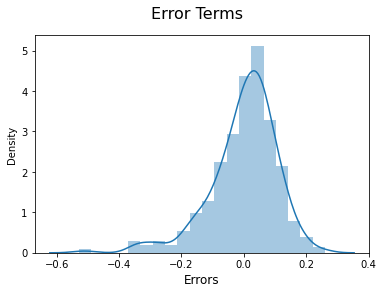

In [ ]:
#Error Terms

error = y_train - y_train_pred
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot(error, bins = 20)
fig.suptitle('Error Terms', fontsize = 16)                  
plt.xlabel('Errors', fontsize = 12)      

Text(0.5, 1.0, 'Normal Q-Q Plot')

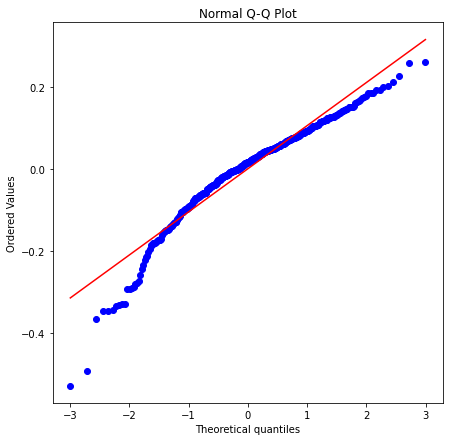

In [ ]:
# Q-Q plot for normal distribution of errors
plt.figure(figsize=(7,7))
stats.probplot(error, dist="norm", plot=plt)
plt.title("Normal Q-Q Plot")

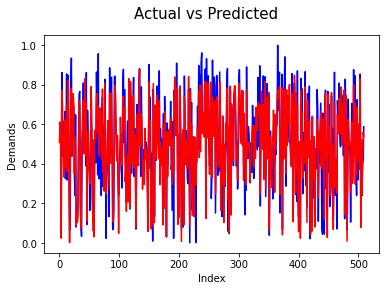

In [ ]:
# Actual vs Predicted
c = [i for i in range(0,len(x_train_rfe),1)]
plt.plot(c,y_train, color="blue")
plt.plot(c,y_train_pred, color="red")
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

Both actual and predicted results followed a pattern that was virtually identical, indicating that this model should be OK.

In [ ]:
# Claculating mean of Residuals
round((y_train-y_train_pred).mean(),2)

-0.0

In [ ]:
#Print R-squared Value
r2_score(y_train,y_train_pred)

0.7861733165682169

In [ ]:
#Assumptions:
# -The errors are spread in a regular manner.
# -The average of the residuals comes out to be zero.

# Making Predictions

In [ ]:
# Applying the scaling on the test sets
num_vars=['temp', 'hum' ,'windspeed','cnt']
test[num_vars]= scaler.transform(test[num_vars])

In [ ]:
y_test = test.pop('cnt')
x_test = test

In [ ]:
# Modifying X_test dataframe by dropping variables eliminated variables from X_test and assigning it to a new data frame
X_test = x_test[x_train_new.columns]

# Adding a constant variable 
X_test = sm.add_constant(X_test)

In [ ]:
# Making predictions
y_pred = model_lm.predict(X_test)
y_pred

468    0.658101
148    0.511910
302    0.396601
355    0.081442
515    0.766164
         ...   
332    0.341694
532    0.715053
558    0.669284
137    0.374215
314    0.332385
Length: 219, dtype: float64

# Evaluation of model

Text(0, 0.5, 'y_pred')

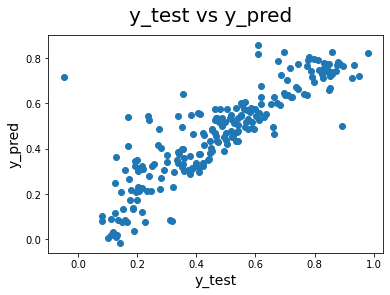

In [ ]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=14)                          # X-label
plt.ylabel('y_pred', fontsize=14)                          # Y-label

In [ ]:
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_pred)
print("Rsquared value of train data: ", r2_train )
print("Rsquared value of test data: ", r2_test )

Rsquared value of train data:  0.7861733165682169
Rsquared value of test data:  0.7491708647197991


Text(0.5, 1.0, 'Normal Q-Q Plot')

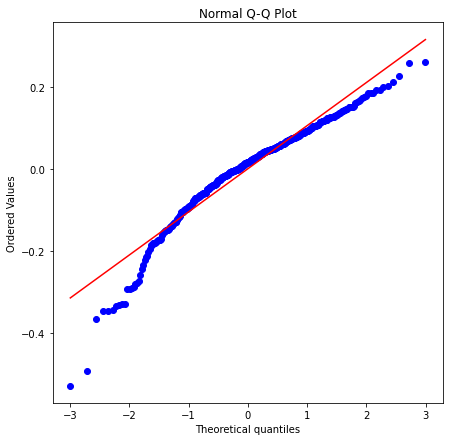

In [ ]:
# Plotting Q-Q plot to confirm normal distribution of errors
plt.figure(figsize=(7,7))
stats.probplot(error, dist="norm", plot=plt)
plt.title("Normal Q-Q Plot")

It has a strong R2 score of 0.749, which suggests that 75 percent of the total quantity of bike rentals can be described by the parameters in the linear regression model created. Thus, the model may be utilised to make decisions based on the data, since it adequately explains it.

In [ ]:
adj_r2_train = 1-(1-r2_train)*(510-1)/(510-11-1)
adj_r2_test = 1-(1-r2_test)*(219-1)/(219-11-1)
print("Adjusted Rsquared value of train data: ", adj_r2_train )
print("Adjusted Rsquared value of test data : ", adj_r2_test )

Adjusted Rsquared value of train data:  0.781450237215306
Adjusted Rsquared value of test data :  0.7358417802363102


In [ ]:
# calculate the mean squared error of train and test data
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_pred)
print('MSE Train: ', mse_train)
print('MSE Test: ', mse_test)

MSE Train:  0.01167587010644326
MSE Test:  0.013565698933493771


In [ ]:
#Function to plot Actual vs Predicted
#Takes Actual and PRedicted values as input along with the scale and Title to indicate which data
def plot_act_pred(act,pred,scale,dataname):
    c = [i for i in range(1,scale,1)]
    fig = plt.figure(figsize=(14,5))
    plt.plot(c,act, color="blue", linewidth=2.5, linestyle="-")
    plt.plot(c,pred, color="red",  linewidth=2.5, linestyle="-")
    fig.suptitle('Actual and Predicted - '+dataname, fontsize=20)              # Plot heading 
    plt.xlabel('Index', fontsize=18)                               # X-label
    plt.ylabel('Counts', fontsize=16)      
    

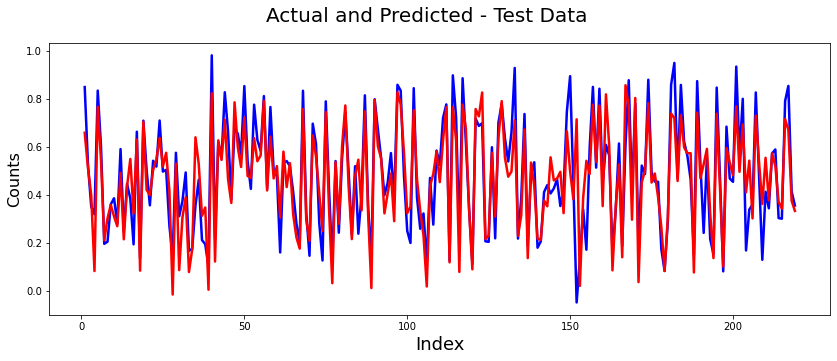

In [ ]:
#Plot Actual vs Predicted for Test Data
plot_act_pred(y_test,y_pred,len(y_test)+1,'Test Data')

In [ ]:
#Inference:
#This shows that test data and train data are similar and model predicts well

In [ ]:
# Error term for test data
def plot_err_terms(act,pred):
    c = [i for i in range(1,220,1)]
    fig = plt.figure(figsize=(14,5))
    plt.plot(c,act-pred, color="blue", marker='o', linewidth=2.5, linestyle="")
    fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
    plt.xlabel('Index', fontsize=18)                      # X-label
    plt.ylabel('Counts - Predicted Counts', fontsize=16)                # Y-label

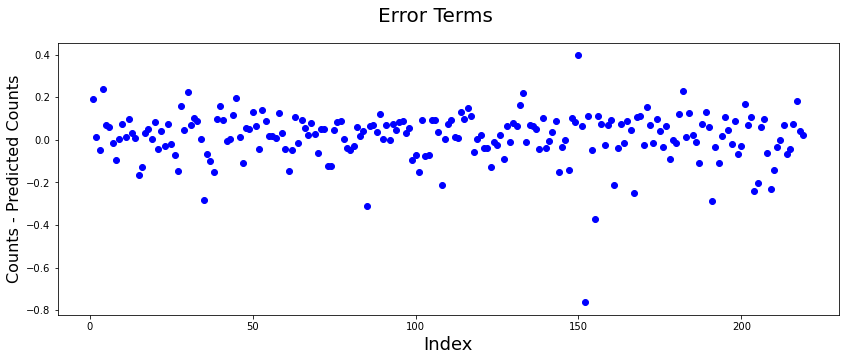

In [ ]:
#Plot error terms for test data
plot_err_terms(y_test,y_pred)

Inference:
As can be seen, the error terms are distributed randomly and show no pattern, indicating that the model adequately explains the output and that no additional parameters can better describe the model.

**Linear Regression Hypotheses Have Been Verified.**

The below are the linear regression assumptions used to build the model.

- There is a linear connection between the expected and actual values.
- The distribution of error terms is normal.
- Training and testing accuracy are practically identical, thus an Overfit/Underfit condition is not present at all.
- There is no correlation between two independent variables that are not mutually exclusive.
- Residual Homoscedasticity.
- A minimum of 20 records are kept for each independent variable.
- Numeric dummy variables are created from all category data.

In [ ]:
# The training and testing accuracy are nearly equal hence there is no Overfit/Underfit situation.
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_pred)
print("Rsquared value of train data: ", r2_train )
print("Rsquared value of test data: ", r2_test )

Rsquared value of train data:  0.7861733165682169
Rsquared value of test data:  0.7491708647197991


In [ ]:
#The train data has R^2 of 78.6% which is similar to test data R^2 of 75%, hence there is no overfitting or underfitting

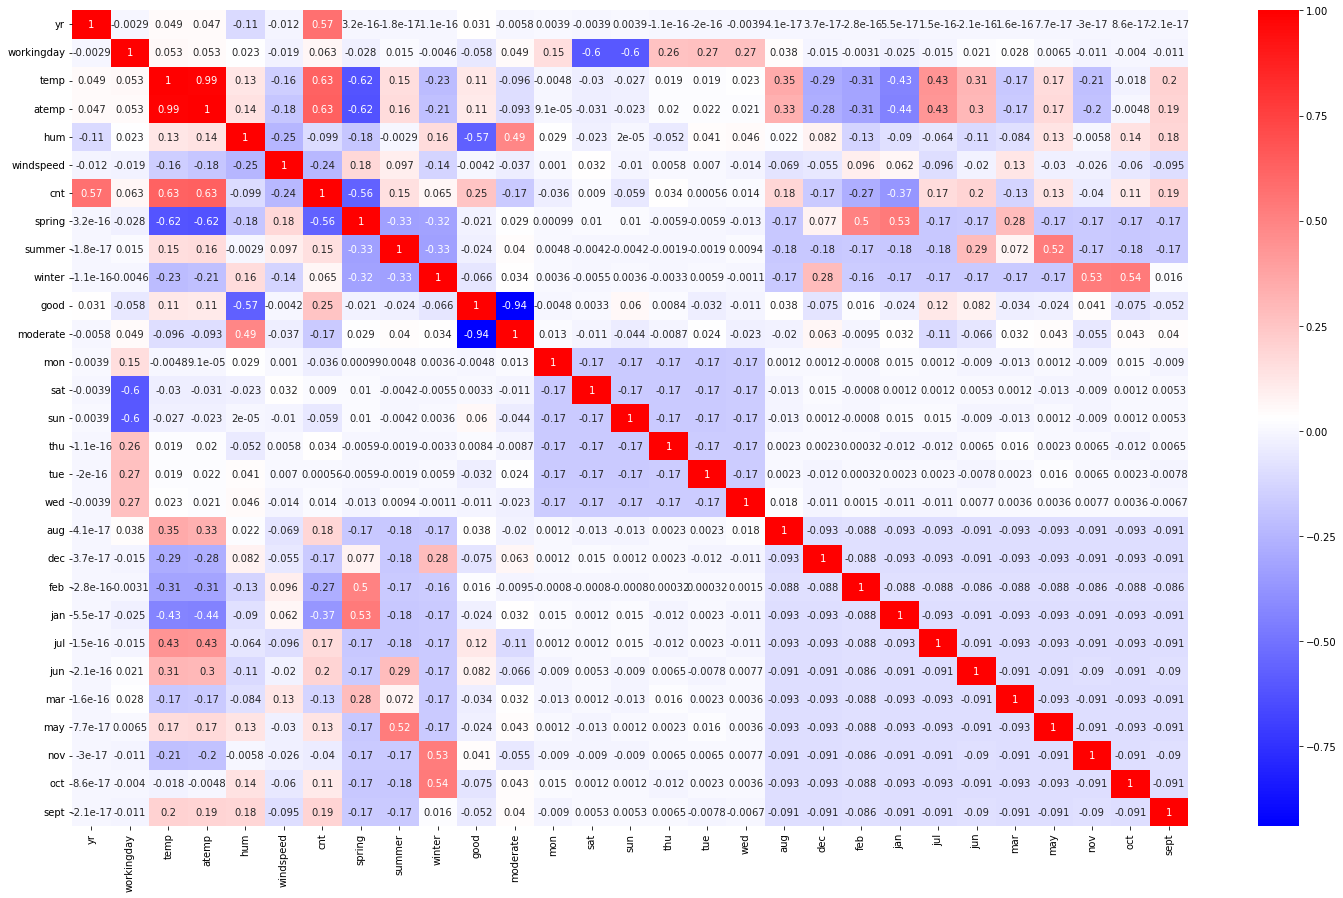

   Features   VIF
1      temp  2.96
3    winter  2.34
0        yr  2.07
8       nov  1.75
4  moderate  1.53
6       jul  1.40
2    spring  1.37
5       dec  1.32
9      sept  1.23
7       mar  1.16


In [ ]:
#  There is no Multicollinearity between two independent variables.
plt.figure(figsize = (25, 15))
sns.heatmap(bikedata.corr(), annot = True, cmap="bwr")
plt.show()
print(vif)

In [ ]:
#The heatmap shows that no variables are strongly connected. It's also clear from VIF values that there is no multicollinearity across any variables. All readings are in a narrow range of less than 5.

In [ ]:
bikedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          730 non-null    int64  
 1   workingday  730 non-null    int64  
 2   temp        730 non-null    float64
 3   atemp       730 non-null    float64
 4   hum         730 non-null    float64
 5   windspeed   730 non-null    float64
 6   cnt         730 non-null    int64  
 7   spring      730 non-null    uint8  
 8   summer      730 non-null    uint8  
 9   winter      730 non-null    uint8  
 10  good        730 non-null    uint8  
 11  moderate    730 non-null    uint8  
 12  mon         730 non-null    uint8  
 13  sat         730 non-null    uint8  
 14  sun         730 non-null    uint8  
 15  thu         730 non-null    uint8  
 16  tue         730 non-null    uint8  
 17  wed         730 non-null    uint8  
 18  aug         730 non-null    uint8  
 19  dec         730 non-null    u

In [ ]:
#All categorical are converted to numeric dummy variables
print(train.info())
print(test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 683 to 435
Data columns (total 28 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          510 non-null    int64  
 1   workingday  510 non-null    int64  
 2   temp        510 non-null    float64
 3   atemp       510 non-null    float64
 4   hum         510 non-null    float64
 5   windspeed   510 non-null    float64
 6   spring      510 non-null    uint8  
 7   summer      510 non-null    uint8  
 8   winter      510 non-null    uint8  
 9   good        510 non-null    uint8  
 10  moderate    510 non-null    uint8  
 11  mon         510 non-null    uint8  
 12  sat         510 non-null    uint8  
 13  sun         510 non-null    uint8  
 14  thu         510 non-null    uint8  
 15  tue         510 non-null    uint8  
 16  wed         510 non-null    uint8  
 17  aug         510 non-null    uint8  
 18  dec         510 non-null    uint8  
 19  feb         510 non-null   

# Conclusion


In [ ]:
#The final model selected is as below
print(model_lm.summary())
print(vif)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     183.5
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          4.57e-160
Time:                        10:31:06   Log-Likelihood:                 411.15
No. Observations:                 510   AIC:                            -800.3
Df Residuals:                     499   BIC:                            -753.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1565      0.028      5.641      0.0

P and VIF values are within the allowed range of 0.05 and 5, respectively, for the model. 
All of the conditions of linear regression are upheld by the model. The link between the total number of bikes rented and the factors that affect this number is shown in the model above.

Final Conclusions are :

- The variables that have positive impact on bike rental are year, temprature, winter, and month - march and sept.

- The variables that have negative impact on bike rental are spring, temp - moderate, month - dec, jul, and nov.

- Therefore, bike demands will be greater in month of march and september in winter weather. Whereas bike rental demand will be less in spring season in the months of July, december, and november.


- It has a strong R2 score of 0.74.9, which suggests that 75 percent of the total number of bike rentals can be described by the factors in the linear regression model created. 
Thus, the model may be utilised to make decisions based on the data, since it adequately explains it.